In [169]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np

df_2018 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2018-pssd-compendium-utf8_1.csv')
df_2017 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2018-pssd-compendium.csv')
df_2016 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2016-pssd-compendium-20171128-utf8.csv')
df_2015 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2015-pssd-compendium-with-addendum-20161219.csv')
df_2014 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\2014-pssd-full-compendium-utf8-en.csv')
df_2013 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\pssd-en-2013.csv')
df_2012 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\pssd-en-2012-fixed_0.csv')
df_2011 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\2011_0.csv',encoding = "ISO-8859-1")
df_2010 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\2010.csv',encoding = "ISO-8859-1")
df_2009 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2009-pssd.csv',encoding = "ISO-8859-1")
df_2008 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2008-pssd.csv',encoding = "ISO-8859-1")
df_2007 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2007-pssd.csv',encoding = "ISO-8859-1")
df_2006 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2006-pssd.csv',encoding = "ISO-8859-1")
df_2005 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2005-pssd.csv',encoding = "ISO-8859-1")
df_2004 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2004-pssd.csv',encoding = "ISO-8859-1")
df_2003 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2003-pssd.csv',encoding = "ISO-8859-1")
df_2002 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2002-pssd.csv',encoding = "ISO-8859-1")
df_2001 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2001-pssd.csv',encoding = "ISO-8859-1")
df_2000 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-2000-pssd.csv',encoding = "ISO-8859-1")
df_1999 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-1999-pssd.csv',encoding = "ISO-8859-1")
df_1998 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-1998-pssd.csv',encoding = "ISO-8859-1")
df_1997 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-1997-pssd.csv',encoding = "ISO-8859-1")
df_1996 = pd.read_csv(r'G:\Python Data\Ontario Public Salaries\en-1996-pssd.csv',encoding = "ISO-8859-1")

#fix column names to be consistent with 2018
df_2014.rename(columns = {'Last name':'Last Name', 'Job title':'Job Title', 'Calendar year':'Calendar Year'}, inplace = True)
df_2011.rename(columns = {'Salary Paid ':'Salary Paid'}, inplace = True)
df_2010.rename(columns = {'Salary Paid ':'Salary Paid'}, inplace = True)
df_2009.rename(columns = {'Salary Paid ':'Salary Paid'}, inplace = True)
df_2001.rename(columns = {'Surname':'Last Name', 'Position':'Job Title'}, inplace = True)
df_1996.drop('Unnamed: 8', axis=1, inplace = True)

In [222]:
import locale

#connect
df_main = pd.concat([df_2018, df_2017, df_2016, df_2015, df_2014, df_2013, df_2012, df_2011, df_2010, df_2009, df_2008, df_2007, df_2006, df_2005, df_2004, df_2003, df_2002, df_2001, df_2000, df_1999, df_1998, df_1997, df_1996])
#remove non-year
df_main['Calendar Year'] = df_main['Calendar Year'].astype(str)
df_main = df_main[df_main['Calendar Year'].apply(lambda x: x.isnumeric())]
df_main['Calendar Year'] = df_main['Calendar Year'].astype(int)


#remove $ from salary & benefits
df_main['Salary Paid'] = df_main['Salary Paid'].astype(str)
locale.setlocale(locale.LC_ALL,'')
df_main['Salary Paid']=df_main['Salary Paid'].map(lambda x: locale.atof(x.strip('$')))
df_main['Salary Paid'] = df_main['Salary Paid'].astype(float)

#df_main['Taxable Benefits'] = df_main['Taxable Benefits'].astype(str)
#df_main = df_main[df_main['Taxable Benefits'].apply(lambda x: x.replace(',',''))]


#Reset the index
df_main.reset_index(drop=True, inplace=True)


In [223]:
df_num_entries = df_main.groupby(['Calendar Year']).size()

In [260]:
df_main['Sector'].unique()

array(['Colleges', 'Crown Agencies', 'Government of Ontario - Judiciary',
       'Government of Ontario - Legislative Assembly and Offices',
       'Government of Ontario - Ministries',
       'Hospitals and Boards of Public Health',
       'Municipalities and Services', 'Ontario Power Generation',
       'Other Public Sector Employers', 'School Boards',
       'Seconded (Advanced Education and Skills Development)*',
       'Seconded (Children and Youth Services)*',
       'Seconded (Community and Social Services)*',
       'Seconded (Community Safety and Correctional Services)*',
       'Seconded (Education)*', 'Seconded (Labour)*', 'Universities',
       'Seconded (Attorney General)*',
       'Seconded (Health and Long-Term Care)*',
       'Seconded (Ministry of Labour)*',
       'Government of Ontario - Legislative Assembly & Offices',
       'Municipalities & Services', 'Hospitals & Boards of Public Health',
       'Seconded (Children & Youth Services)*',
       'Seconded (Communit

In [259]:
df_main.groupby('Sector')['Salary Paid'].mean()

Sector
COLLEGES                                           117502.008462
CROWN AGENCIES                                     118913.209950
Colleges                                           115384.127985
Crown Agencies                                     135721.630548
Government of Ontario - Judiciary                  199827.697499
                                                       ...      
Seconded (Training, Colleges and Universities)*    102175.710000
Seconded (Transportation)*                         180204.550000
UNIVERSITIES                                       116517.274437
Universities                                       139882.508353
Universities - Universités                         200777.195000
Name: Salary Paid, Length: 67, dtype: float64

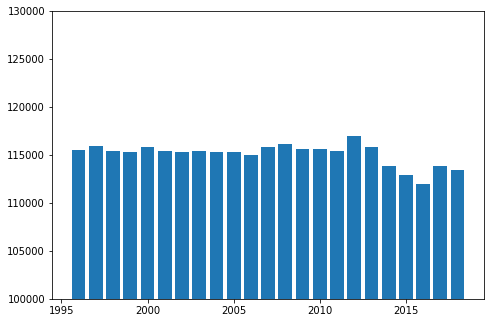

In [239]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_main['Calendar Year'].unique(),df_main.groupby('Calendar Year')['Salary Paid'].median())
ax.set_ylim([100000,130000])
plt.show()

In [257]:
df_main.sort_values(by=['Salary Paid'], ascending = False)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
1149732,Municipalities and Services,HARRIS,STEPHEN,12805985.00,"$11,587.55",City of Toronto - Toronto Police Service,Staff Inspector,2006
1165560,Hospitals and Boards of Public Health,YELLE-WEATHERALL,JOANNE,12745500.00,$483.52,SCO Health Service,"Director Operations, Elisabeth-Bruyère Researc...",2006
1058191,Hydro One and Ontario Power Generation,HANKINSON,JAMES F,2475800.04,"$9,145.85",Ontario Power Generation,President/Chief Executive Officer,2008
1245211,Hydro One and Ontario Power Generation,OSBORNE,RONALD,2264310.72,"$7,956.00",Ontario Power Generation,President & CEO,2002
1092656,Crown Agencies,HAGGIS,PAUL,2240007.70,"$9,551.80",OMERS Administration Corporation,"President/Chief Executive Officer, OMERS",2007
...,...,...,...,...,...,...,...,...
1276311,School Boards,CRÉPEAU,FERNAND,100000.00,$600.80,CSDC Franco-Nord,Surintendant,2000
491802,Universities,Collingridge,Graham,100000.00,$380.04,University of Toronto,"Professor And Chair, Physiology",2015
244501,Other Public Sector Employers,Palmer,Donald,100000.00,"$9,091.00",Causeway Work Centre,Executive Director,2017
241073,Other Public Sector Employers,Mcreynolds,Stuart,100000.00,$0.00,Abilities Centre,"Director, Sport and Recreation",2017


In [258]:
df_main[df_main['Last Name'] == 'Nguyen'].sort_values(by=['Salary Paid'],ascending= False)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
619795,Hospitals and Boards of Public Health,Nguyen,Truong,319334.66,"$1,034.40",Guelph General Hospital,Pathologist / Pathologiste,2014
506108,Hospitals & Boards of Public Health,Nguyen,Truong,305606.92,"$1,034.40",Guelph General Hospital,Pathologist/Pathologiste,2015
309904,Hospitals and Boards of Public Health,Nguyen,Truong,303064.22,$280.80,Guelph General Hospital,Pathologist,2016
32707,Hospitals and Boards of Public Health,Nguyen,Truong,288941.33,$ 40.65,Guelph General Hospital,Pathologist/Pathologiste,2018
190901,Hospitals and Boards of Public Health,Nguyen,Truong,285349.01,$105.69,Guelph General Hospital,Pathologist/Pathologiste,2017
...,...,...,...,...,...,...,...,...
316017,Hospitals and Boards of Public Health,Nguyen,Goretti,100150.08,$633.42,"St. Joseph's Health Centre, Toronto",Registered Pharmacist,2016
37965,Hospitals and Boards of Public Health,Nguyen,Chan,100128.31,$ 398.1,North Bay Regional Health Centre,Physician Assistant/Médecin Assistant,2018
316018,Hospitals and Boards of Public Health,Nguyen,Xuan Chi Nga,100117.11,$503.36,"St. Joseph's Health Centre, Toronto",Registered Nurse,2016
479381,School Boards,Nguyen,Hang,100097.66,$-,Toronto District School Board,"Teacher, Secondary",2015
